# Hierarchical Clustering 

## Coding Part

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

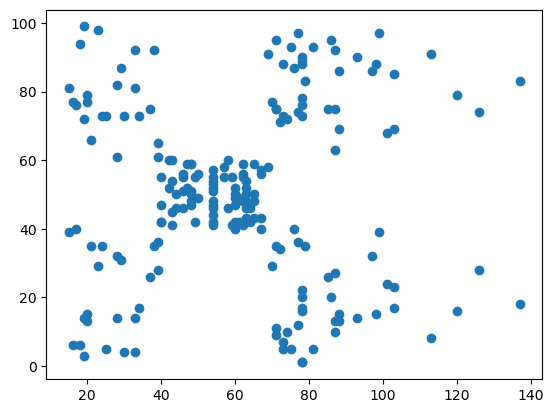

In [10]:
# lets see the scatter plot. 
x = dataset["Annual Income (k$)"]
y = dataset["Spending Score (1-100)"]

plt.scatter(x,y)

In [18]:
X = dataset.iloc[:,[3,4]].values

## Dendrogram
to find the optimal number of clusters

In [11]:
import scipy.cluster.hierarchy as sch

In [19]:
data = sch.linkage(X,method = "ward")

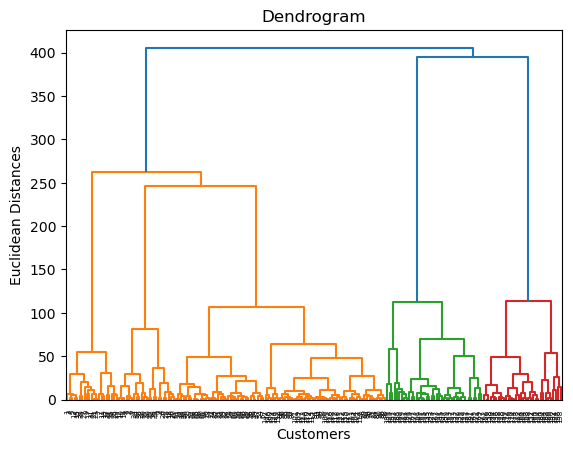

In [20]:
dendrogram = sch.dendrogram(data)

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Hierarchical Clustering Model

In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")

y_hc = hc.fit_predict(X)

In [22]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [23]:
df = pd.DataFrame(y_hc,columns=["cluster"])
df

,cluster
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [24]:
final = pd.concat([dataset,df],axis=1)
final

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [26]:
f = final[final["cluster"]==0]
f

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0
140,141,Female,57,75,5,0
144,145,Male,25,77,12,0
148,149,Female,34,78,22,0
150,151,Male,43,78,17,0
152,153,Female,44,78,20,0
